In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from io import StringIO

%matplotlib inline

In [3]:
file_name='/home/maki/projects/asl-fall18-project/asl-scripts/06_experiment/remote_b/client2/06_1_experiment/06_1_experiment/multi_get/1/log-1-64-3.txt'

In [3]:
def get_df(file):
    content=list()
    with open(file) as f:
        for line in f:
            if line.startswith('GET'):
                content.append(re.sub(' +',' ',line))
    content = '\n'.join([x.replace(' ',',') for x in content])
    content='type,time,percent\n'+content.strip()
    return pd.read_csv(StringIO(content))
    

In [4]:
df=get_df(file_name)
df.drop(columns=['type'],inplace=True)
# print(np.mean((np.diff(df.time) * np.diff(df.percent))))
# plt.plot((np.diff(df.time) * np.diff(df.percent)))
# np.diff(df.percent)

In [5]:
# tmp['time_norm']=tmp['time']-tmp.time.min()
# tmp['time_norm']

In [6]:
to_eval=pd.DataFrame()
# to_eval['time']=np.diff(tmp['time'])
to_eval['time']=df['time'].values
# to_eval['time_norm']=np.diff(tmp['time_norm'])
to_eval['percent']=np.append([0],np.diff(df['percent']))
to_eval['th']=to_eval['percent']*469/100
#to_eval[(to_eval['time']<=1)&(to_eval['time']>=0.09)]['percent']*469/100
# to_eval['th']=to_eval.percent*469/100

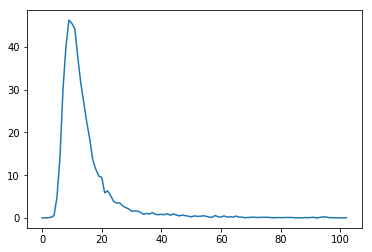

In [20]:
rt_bins=to_eval.time
hists = to_eval.th#[4:29]
rt_bins=rt_bins#[4:29]
plt.plot(hists)

In [21]:
rt_bins

0        0.92
1        0.96
2        0.98
3        0.99
4        1.00
5        1.10
6        1.20
7        1.30
8        1.40
9        1.50
10       1.60
11       1.70
12       1.80
13       1.90
14       2.00
15       2.10
16       2.20
17       2.30
18       2.40
19       2.50
20       2.60
21       2.70
22       2.80
23       2.90
24       3.00
25       3.10
26       3.20
27       3.30
28       3.40
29       3.50
        ...  
73       7.90
74       8.00
75       8.10
76       8.20
77       8.40
78       8.50
79       8.60
80       8.70
81       8.80
82       8.90
83       9.00
84       9.10
85       9.20
86       9.30
87       9.40
88       9.50
89       9.60
90       9.70
91       9.80
92       9.90
93      10.00
94      11.00
95      12.00
96      13.00
97      14.00
98      15.00
99      19.00
100     20.00
101     22.00
102    150.00
Name: time, Length: 103, dtype: float64

<BarContainer object of 93 artists>

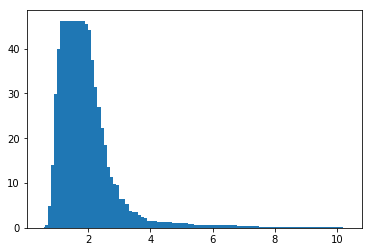

In [11]:
inliers=rt_bins<10 # 10ms
plt.bar(rt_bins[inliers],hists[inliers])

In [19]:
for h, r in zip(hists[inliers].round(2), rt_bins[inliers].round(2)):
    print('%s\t%s' %(h,r))

0.0	0.92
0.0	0.96
0.05	0.98
0.14	0.99
0.52	1.0
4.83	1.1
14.07	1.2
29.83	1.3
40.01	1.4
46.24	1.5
45.49	1.6
44.23	1.7
37.43	1.8
31.42	1.9
26.92	2.0
22.32	2.1
18.38	2.2
13.55	2.3
11.4	2.4
9.8	2.5
9.47	2.6
5.86	2.7
6.33	2.8
5.21	2.9
3.85	3.0
3.47	3.1
3.52	3.2
2.81	3.3
2.44	3.4
2.11	3.5
1.59	3.6
1.59	3.7
1.59	3.8
1.31	3.9
0.84	4.0
1.03	4.1
0.94	4.2
1.22	4.3
0.84	4.4
0.75	4.5
0.84	4.6
0.75	4.7
0.98	4.8
0.61	4.9
0.94	5.0
0.7	5.1
0.47	5.2
0.66	5.3
0.52	5.4
0.42	5.5
0.23	5.6
0.47	5.7
0.38	5.8
0.38	5.9
0.52	6.0
0.38	6.1
0.19	6.2
0.14	6.3
0.56	6.4
0.28	6.5
0.19	6.6
0.47	6.7
0.19	6.8
0.28	6.9
0.19	7.0
0.42	7.1
0.19	7.2
0.19	7.3
0.05	7.4
0.09	7.5
0.14	7.6
0.19	7.7
0.09	7.8
0.14	7.9
0.14	8.0
0.14	8.1
0.14	8.2
0.05	8.4
0.05	8.5
0.09	8.6
0.05	8.7
0.09	8.8
0.09	8.9
0.09	9.0
0.09	9.1
0.0	9.2
0.05	9.3
0.0	9.4
0.09	9.5
0.05	9.6
0.09	9.7
0.14	9.8
0.0	9.9


In [4]:
df=pd.read_csv('/home/maki/projects/asl-fall18-project/asl-scripts/src_06/stats_multi_get_sharded.csv')

In [10]:
df.groupby('key_size').mean()['r_waitingServiceTimer']

key_size
1    0.432255
3    0.688765
6    2.127995
9    4.010186
Name: r_waitingServiceTimer, dtype: float64

In [24]:
ds=(4096+576)/8000000
freqs=1/(0.688765/1000)
elems=16

In [25]:
print(elems*freqs*ds)

13.566310715556105


In [28]:
df.groupby('key_size').mean()['mw_systemRequests']

key_size
1    3.000000
3    3.333333
6    4.333333
9    5.000000
Name: mw_systemRequests, dtype: float64